# Can we use Sentiment Analysis to predict stock price?

- Stocks (the price of a company)
- Sentiment Analysis: taking text and converting it into a numeric value to represent the feeling of the text.

# Stock Price / Sentiment Indicators

Goal of this notebook:

 1. Learn how to pull historic stock prices with python.
 2. Explore stock prices and learn how to plot them.
 3. Learn how to pull historic tweet data about a specific stock.
 4. Run sentiment analysis on tweets.
 5. See if there are any leading indicators of stock prices with sentiment. (probably not) 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
from datetime import datetime


In [9]:
# !pip install yfinance

## Example pulling Microsoft Stock

In [10]:
msft = yf.Ticker("MSFT")

In [11]:
msft

yfinance.Ticker object <MSFT>

In [12]:
info = msft.fast_info

In [13]:
info

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [14]:
info.keys()

['currency',
 'dayHigh',
 'dayLow',
 'exchange',
 'fiftyDayAverage',
 'lastPrice',
 'lastVolume',
 'marketCap',
 'open',
 'previousClose',
 'quoteType',
 'regularMarketPreviousClose',
 'shares',
 'tenDayAverageVolume',
 'threeMonthAverageVolume',
 'timezone',
 'twoHundredDayAverage',
 'yearChange',
 'yearHigh',
 'yearLow']

In [15]:
# msft.info   not supporting anymore

In [16]:
# msft

In [17]:
hist = msft.history(period="max")

In [18]:
type(hist)

pandas.core.frame.DataFrame

In [19]:
hist

Open        High         Low       Close  \
Date                                                                        
1986-03-13 00:00:00-05:00    0.055241    0.063365    0.055241    0.060657   
1986-03-14 00:00:00-05:00    0.060657    0.063907    0.060657    0.062823   
1986-03-17 00:00:00-05:00    0.062823    0.064448    0.062823    0.063907   
1986-03-18 00:00:00-05:00    0.063906    0.064448    0.061740    0.062281   
1986-03-19 00:00:00-05:00    0.062281    0.062823    0.060657    0.061198   
...                               ...         ...         ...         ...   
2023-03-14 00:00:00-04:00  256.750000  261.070007  255.860001  260.790009   
2023-03-15 00:00:00-04:00  259.980011  266.480011  259.209991  265.440002   
2023-03-16 00:00:00-04:00  265.209991  276.559998  263.279999  276.200012   
2023-03-17 00:00:00-04:00  278.260010  283.329987  276.320007  279.429993   
2023-03-20 00:00:00-04:00  276.980011  277.480011  269.850006  272.230011   

                               Volume  Dividends  Stock Splits  
Date                                                            
1986-03-13 00:00:00-05:00  1031788800        0.0           0.0  
1986-03-14 00:00:00-05:00   308160000        0.0           0.0  
1986-03-17 00:00:00-05:00   133171200        0.0           0.0  
1986-03-18 00:00:00-05:00    67766400        0.0           0.0  
1986-03-19 00:00:00-05:00    47894400        0.0           0.0  
...                               ...        ...           ...  
2023-03-14 00:00:00-04:00    33620300        0.0           0.0  
2023-03-15 00:00:00-04:00    46028000        0.0           0.0  
2023-03-16 00:00:00-04:00    54768800        0.0           0.0  
2023-03-17 00:00:00-04:00    69492200        0.0           0.0  
2023-03-20 00:00:00-04:00    43420376        0.0           0.0  

[9330 rows x 7 columns]

<AxesSubplot:xlabel='Date'>

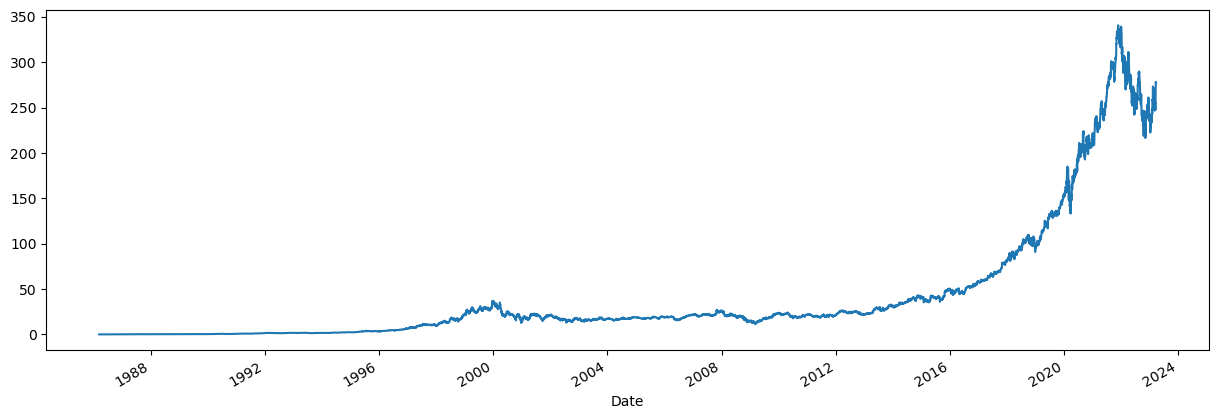

In [20]:
hist['Open'].plot(figsize=(15,5))

In [21]:
msft.actions

Dividends  Stock Splits
Date                                              
1987-09-21 00:00:00-04:00       0.00           2.0
1990-04-16 00:00:00-04:00       0.00           2.0
1991-06-27 00:00:00-04:00       0.00           1.5
1992-06-15 00:00:00-04:00       0.00           1.5
1994-05-23 00:00:00-04:00       0.00           2.0
...                              ...           ...
2022-02-16 00:00:00-05:00       0.62           0.0
2022-05-18 00:00:00-04:00       0.62           0.0
2022-08-17 00:00:00-04:00       0.62           0.0
2022-11-16 00:00:00-05:00       0.68           0.0
2023-02-15 00:00:00-05:00       0.68           0.0

[86 rows x 2 columns]

In [22]:
msft.splits

Date
1987-09-21 00:00:00-04:00    2.0
1990-04-16 00:00:00-04:00    2.0
1991-06-27 00:00:00-04:00    1.5
1992-06-15 00:00:00-04:00    1.5
1994-05-23 00:00:00-04:00    2.0
1996-12-09 00:00:00-05:00    2.0
1998-02-23 00:00:00-05:00    2.0
1999-03-29 00:00:00-05:00    2.0
2003-02-18 00:00:00-05:00    2.0
Name: Stock Splits, dtype: float64

In [23]:
msft.dividends

Date
2003-02-19 00:00:00-05:00    0.08
2003-10-15 00:00:00-04:00    0.16
2004-08-23 00:00:00-04:00    0.08
2004-11-15 00:00:00-05:00    3.08
2005-02-15 00:00:00-05:00    0.08
                             ... 
2022-02-16 00:00:00-05:00    0.62
2022-05-18 00:00:00-04:00    0.62
2022-08-17 00:00:00-04:00    0.62
2022-11-16 00:00:00-05:00    0.68
2023-02-15 00:00:00-05:00    0.68
Name: Dividends, Length: 77, dtype: float64

In [24]:
msft.earnings

Exception: yfinance failed to decrypt Yahoo data response

In [ ]:

msft.quarterly_earnings

In [25]:
msft.earnings_dates

EPS Estimate  Reported EPS  Surprise(%)
Earnings Date                                                     
2024-01-22 16:00:00-05:00           NaN           NaN          NaN
2024-01-22 05:00:00-05:00           NaN           NaN          NaN
2023-10-23 06:00:00-04:00           NaN           NaN          NaN
2023-07-24 06:00:00-04:00           NaN           NaN          NaN
2023-04-24 06:00:00-04:00          2.23           NaN          NaN
2023-01-24 11:00:00-05:00          2.30          2.32       0.0109
2022-10-25 12:00:00-04:00          2.30          2.35       0.0204
2022-07-26 12:00:00-04:00          2.29          2.23      -0.0275
2022-04-26 12:00:00-04:00          2.19          2.22       0.0160
2022-01-25 11:00:00-05:00          2.31          2.48       0.0727
2021-10-26 12:00:00-04:00          2.08          2.27       0.0940
2021-07-27 12:00:00-04:00          1.92          2.17       0.1326

In [45]:
msft.calendar

# Pull a bunch of stocks

In [46]:
# use sublime to extract the list of stock tickers.  control + shift + L

In [51]:
# select top 10 recommended stocks to buy.  

# - 3 Years of history

In [26]:
stonks = ["ETSY", "PINS", "SQ", "SHOP", "O", "MELI", "ISRG", "DIS", "BRK-B", "AMZN","ZM", "PFE","CLX","TSLA"]

In [27]:
len(stonks)

14

In [28]:
hists = {}
for s in stonks:
    tkr = yf.Ticker(s)
    history = tkr.history(period="3y")
    hists[s] = history
    

In [29]:
history = tkr.history(period='3y')

In [30]:
history

Open        High         Low       Close  \
Date                                                                        
2020-03-23 00:00:00-04:00   28.906668   29.466667   27.366667   28.952667   
2020-03-24 00:00:00-04:00   31.820000   34.245998   31.600000   33.666668   
2020-03-25 00:00:00-04:00   36.349998   37.133331   34.074001   35.950001   
2020-03-26 00:00:00-04:00   36.492668   37.333332   34.150002   35.210667   
2020-03-27 00:00:00-04:00   33.666668   35.053333   32.935333   34.290668   
...                               ...         ...         ...         ...   
2023-03-14 00:00:00-04:00  177.309998  183.800003  177.139999  183.259995   
2023-03-15 00:00:00-04:00  180.800003  182.339996  176.029999  180.449997   
2023-03-16 00:00:00-04:00  180.369995  185.809998  178.839996  184.130005   
2023-03-17 00:00:00-04:00  184.520004  186.220001  177.330002  180.130005   
2023-03-20 00:00:00-04:00  178.080002  186.440002  176.350006  183.250000   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-03-23 00:00:00-04:00  246817500        0.0           0.0  
2020-03-24 00:00:00-04:00  343428000        0.0           0.0  
2020-03-25 00:00:00-04:00  318340500        0.0           0.0  
2020-03-26 00:00:00-04:00  260710500        0.0           0.0  
2020-03-27 00:00:00-04:00  215661000        0.0           0.0  
...                              ...        ...           ...  
2023-03-14 00:00:00-04:00  143717900        0.0           0.0  
2023-03-15 00:00:00-04:00  145995600        0.0           0.0  
2023-03-16 00:00:00-04:00  121136800        0.0           0.0  
2023-03-17 00:00:00-04:00  132936600        0.0           0.0  
2023-03-20 00:00:00-04:00  128557162        0.0           0.0  

[754 rows x 7 columns]

In [31]:
hists["TSLA"]

Open        High         Low       Close  \
Date                                                                        
2020-03-23 00:00:00-04:00   28.906668   29.466667   27.366667   28.952667   
2020-03-24 00:00:00-04:00   31.820000   34.245998   31.600000   33.666668   
2020-03-25 00:00:00-04:00   36.349998   37.133331   34.074001   35.950001   
2020-03-26 00:00:00-04:00   36.492668   37.333332   34.150002   35.210667   
2020-03-27 00:00:00-04:00   33.666668   35.053333   32.935333   34.290668   
...                               ...         ...         ...         ...   
2023-03-14 00:00:00-04:00  177.309998  183.800003  177.139999  183.259995   
2023-03-15 00:00:00-04:00  180.800003  182.339996  176.029999  180.449997   
2023-03-16 00:00:00-04:00  180.369995  185.809998  178.839996  184.130005   
2023-03-17 00:00:00-04:00  184.520004  186.220001  177.330002  180.130005   
2023-03-20 00:00:00-04:00  178.080002  186.440002  176.350006  183.250000   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-03-23 00:00:00-04:00  246817500        0.0           0.0  
2020-03-24 00:00:00-04:00  343428000        0.0           0.0  
2020-03-25 00:00:00-04:00  318340500        0.0           0.0  
2020-03-26 00:00:00-04:00  260710500        0.0           0.0  
2020-03-27 00:00:00-04:00  215661000        0.0           0.0  
...                              ...        ...           ...  
2023-03-14 00:00:00-04:00  143717900        0.0           0.0  
2023-03-15 00:00:00-04:00  145995600        0.0           0.0  
2023-03-16 00:00:00-04:00  121136800        0.0           0.0  
2023-03-17 00:00:00-04:00  132936600        0.0           0.0  
2023-03-20 00:00:00-04:00  128557162        0.0           0.0  

[754 rows x 7 columns]

# plot the stock price

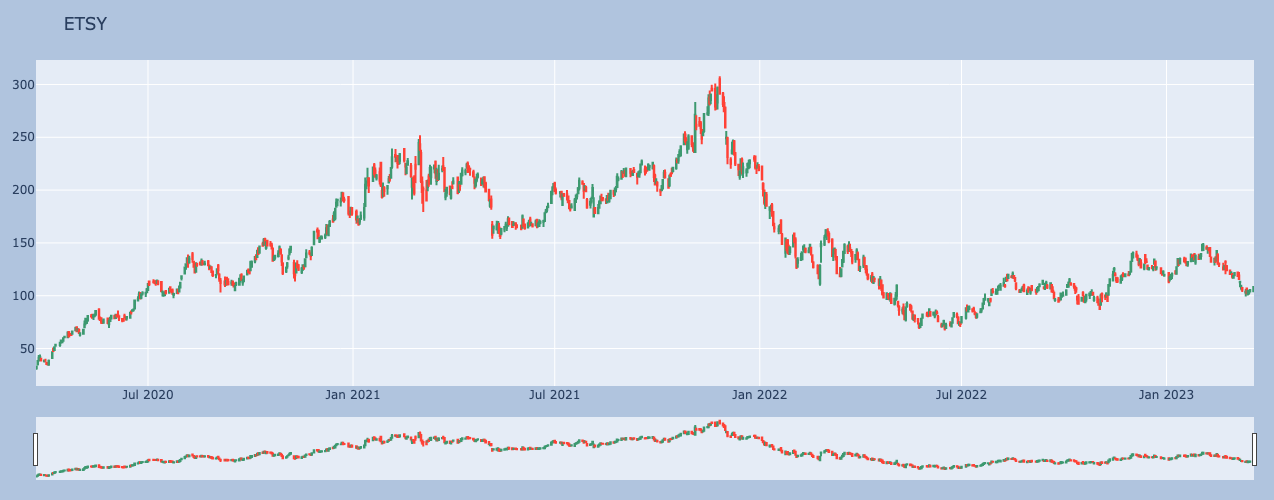

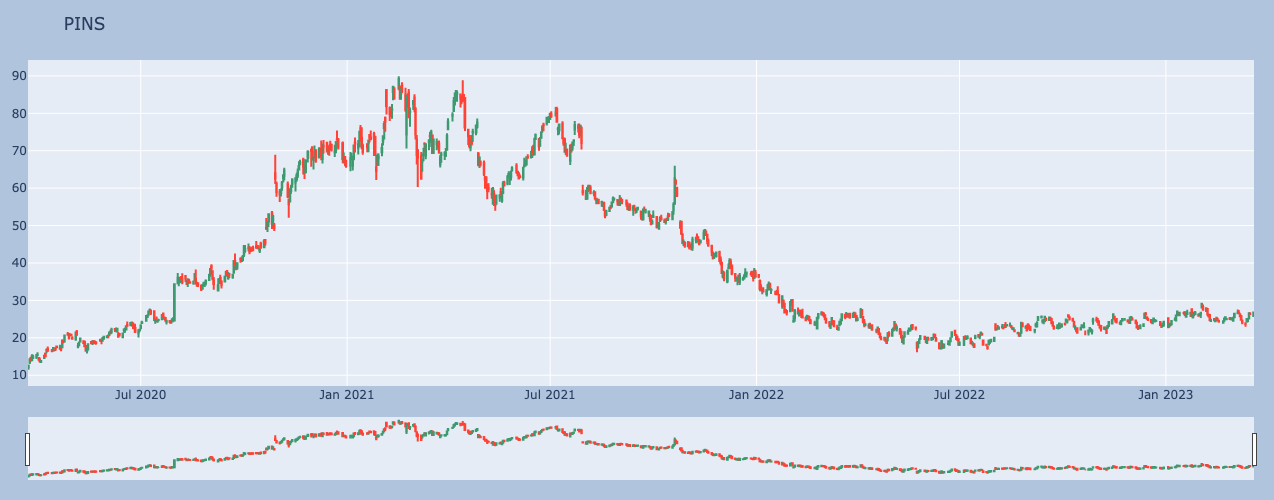

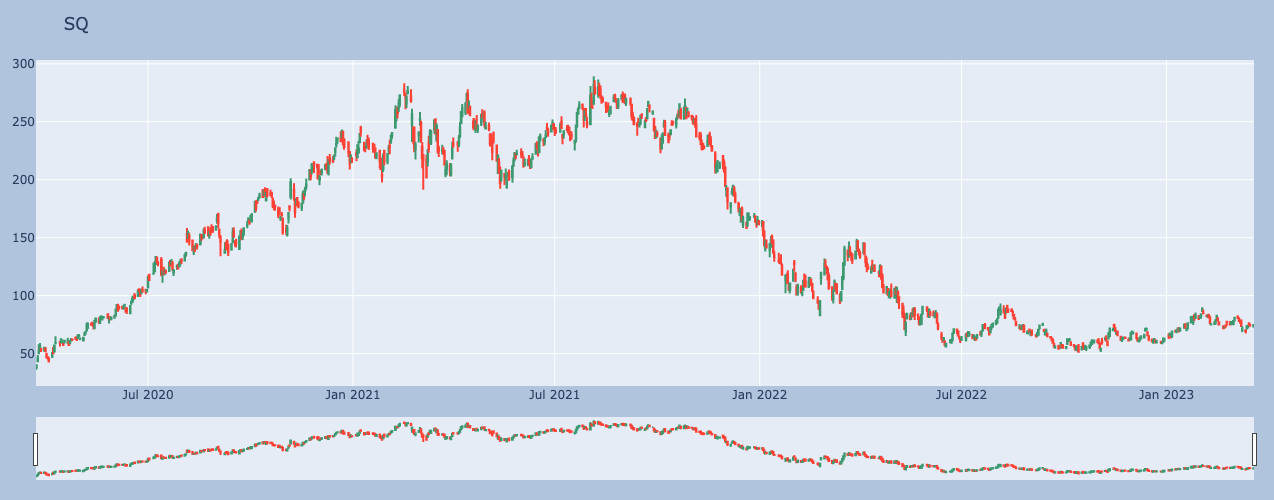

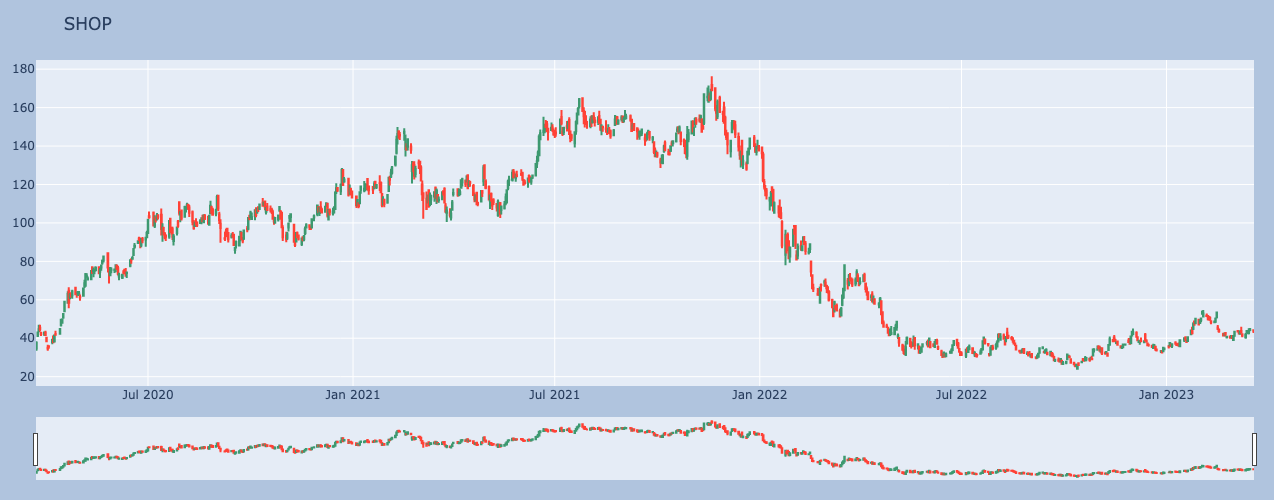

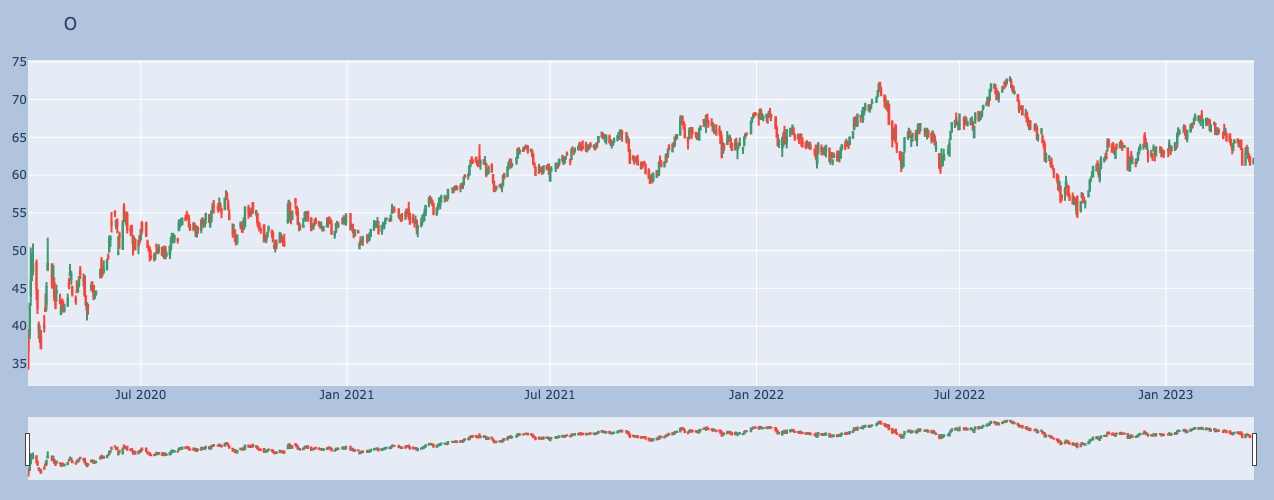

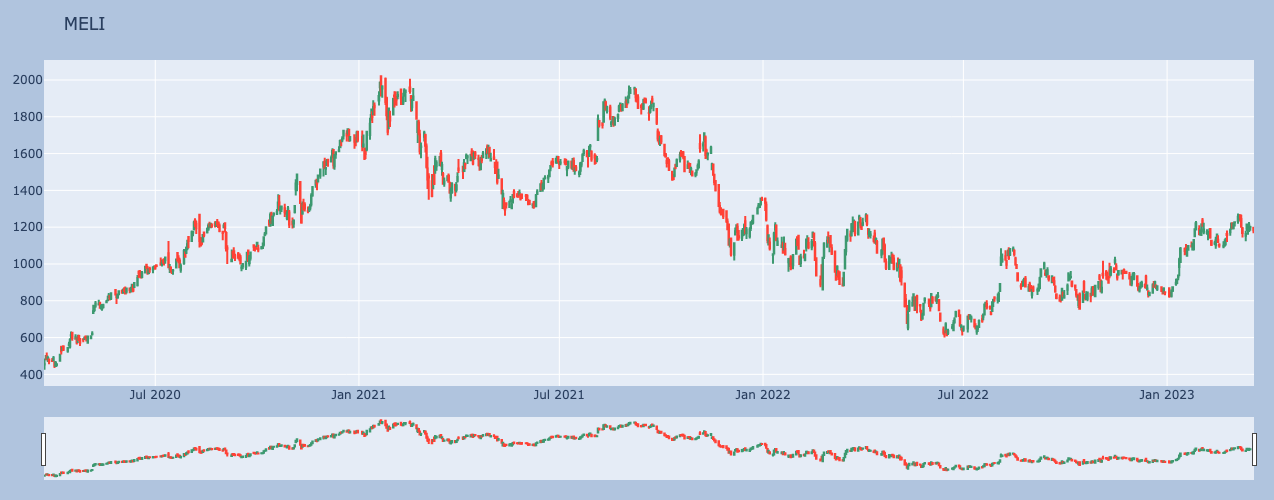

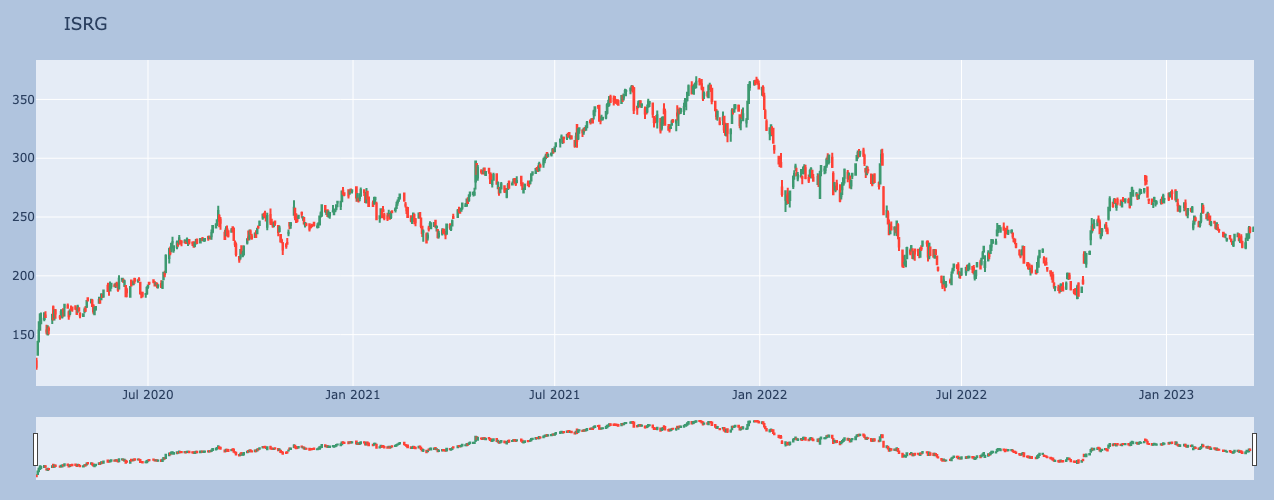

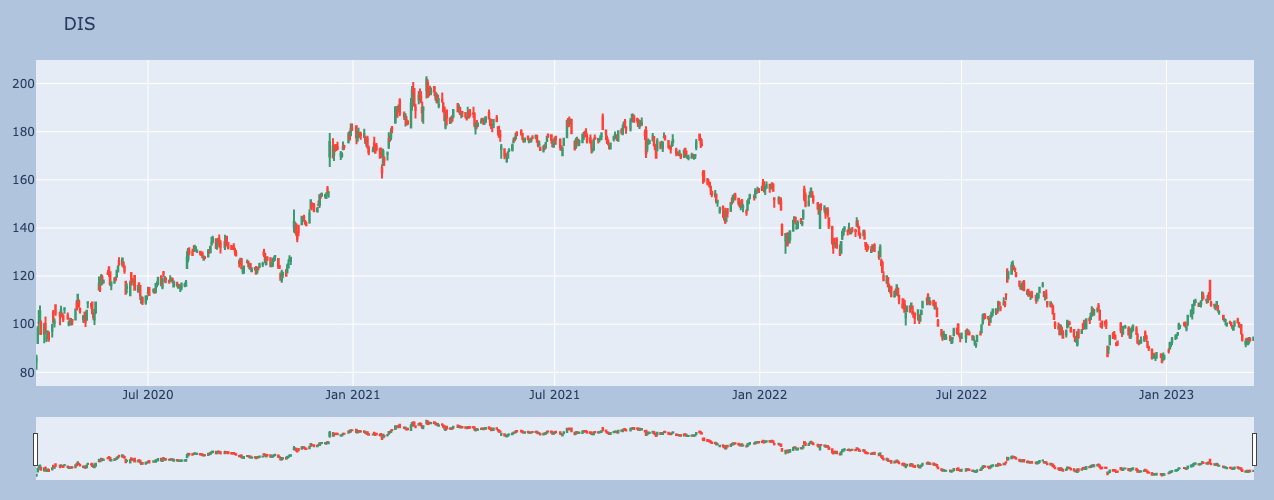

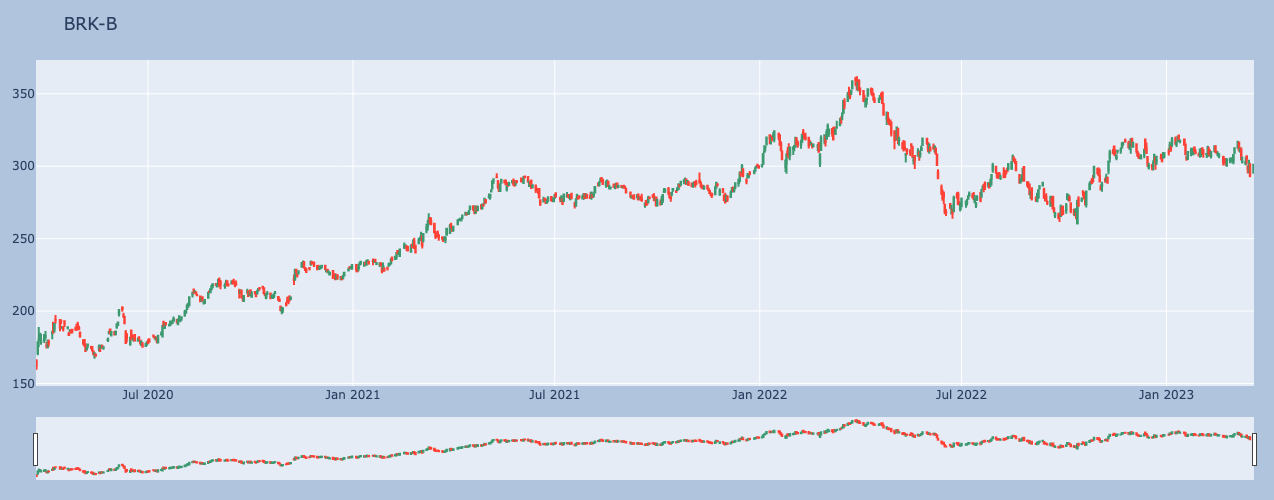

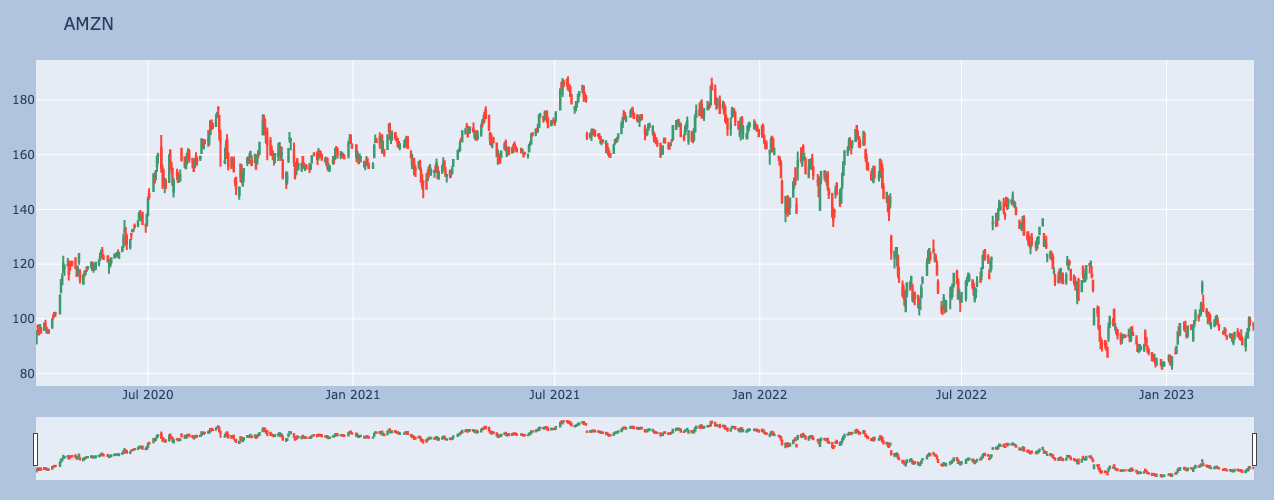

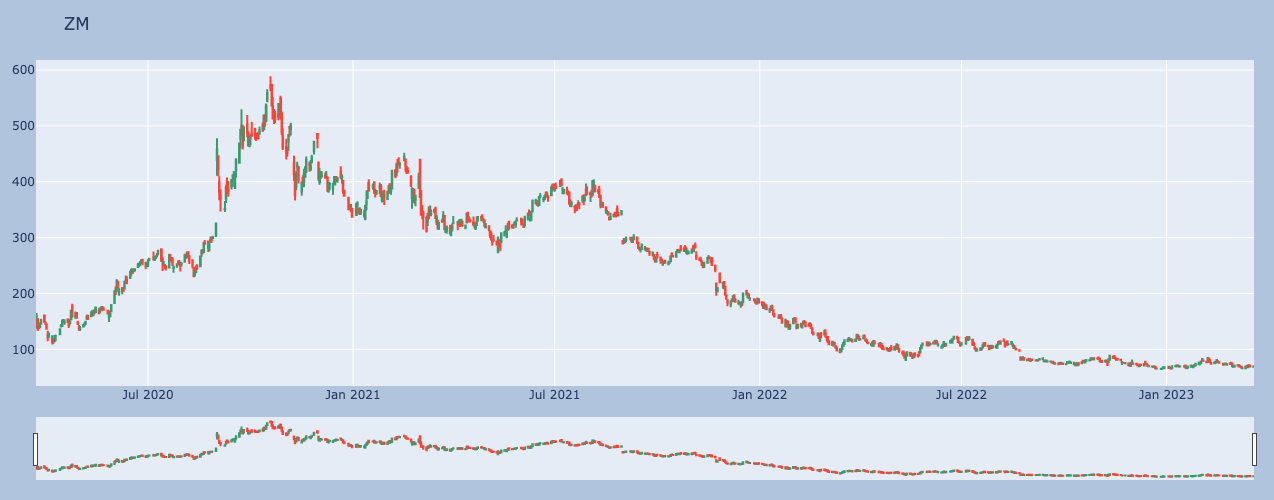

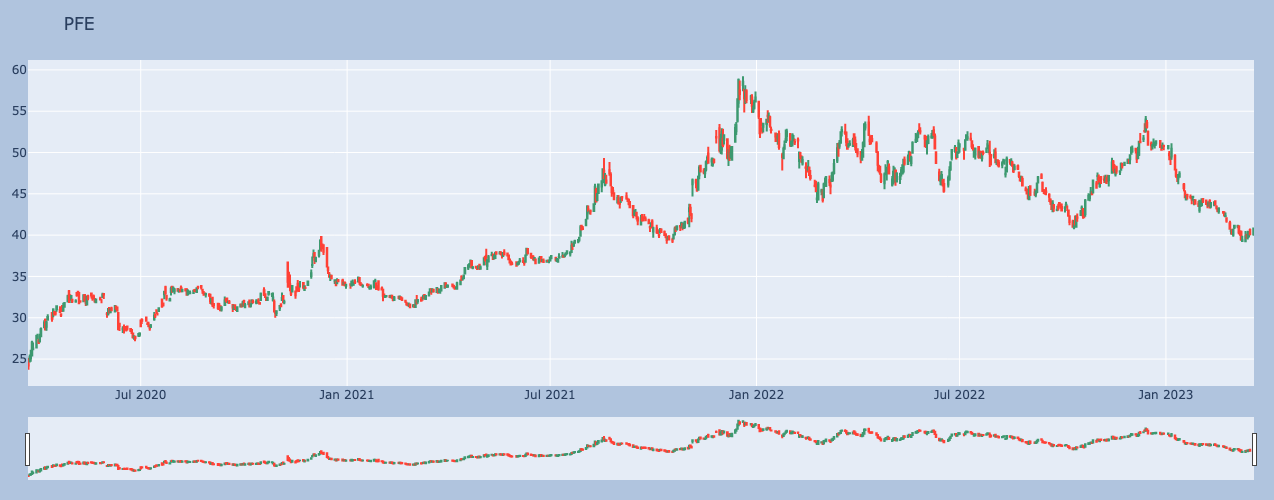

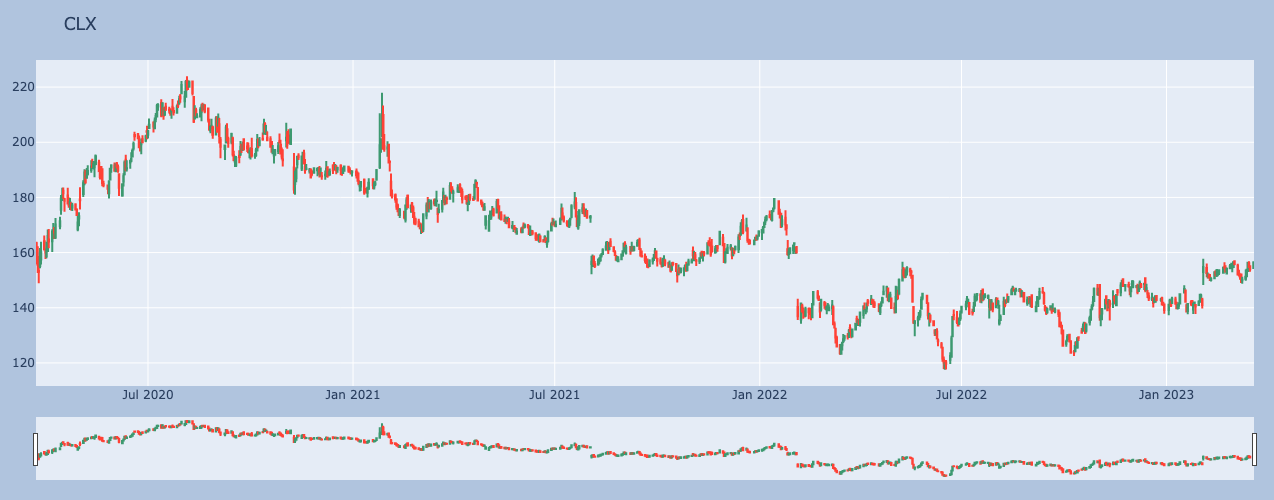

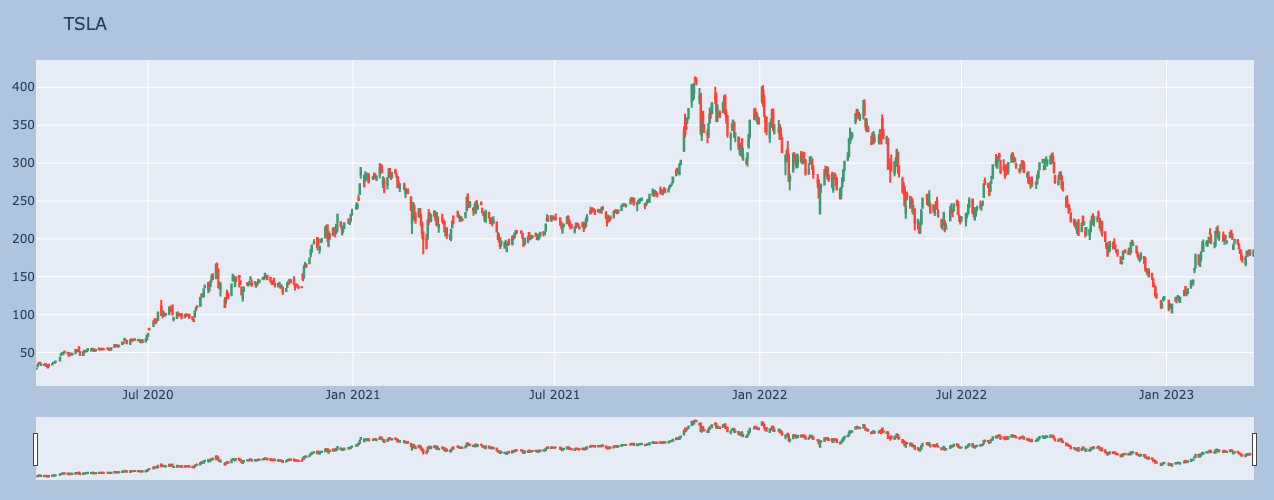

In [32]:
for stock in stonks:

    temp_df = hists[stock].copy()

    fig = go.Figure(data=[go.Candlestick(x=temp_df.index,
                    open=temp_df['Open'],
                    high=temp_df['High'],
                    low=temp_df['Low'],
                    close=temp_df['Close'],)])

    fig.update_layout(
        margin=dict(l=20, r=20, t=60, b=20),
        height=500,
        paper_bgcolor="LightSteelBlue",
        title = stock
    )

    fig.show()

# Pull Tweets about each Stock

In [34]:
stock = "CLX"

In [109]:
# importing libraries and packages
import snscrape.modules.twitter as sntwitter
import pandas
from tqdm.notebook import tqdm

# Cresting list sto append tweet data
tweets_list =[]

    # Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in tqdm(
    enumerate(
        sntwitter.TwitterSearchScraper(
            f"${stock} since:2019-11-04 until:2023-03-19"
        ).get_items()
    ),
    total=12_000,
):  # declare a username
    if i > 12_000:  # number of tweets you want to scrape
        break
    tweets_list.append(
        [tweet.date, tweet.id, tweet.content, tweet.user.username]
    )  # declare the attributes to be returned
# Creating a dataframe from the tweets list above
tweet_df = pd.DataFrame(
    tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
)


  0%|          | 0/12000 [00:00<?, ?it/s]

/var/folders/w5/ln6jl9bd0zd09jkkpx_9_zlc0000gn/T/ipykernel_47421/4027134596.py:21: DeprecatedFeatureWarning:

content is deprecated, use rawContent instead



In [35]:
tweet_df

NameError: name 'tweet_df' is not defined

In [108]:
tweet_df["Datetime"].min()

Timestamp('2023-02-10 23:26:29+0000', tz='UTC')

# Sentiment Analysis Prep

In [39]:
tweet_df

Datetime             Tweet Id  \
0     2023-03-18 23:53:00+00:00  1637240720128897024   
1     2023-03-18 19:07:38+00:00  1637168905188671488   
2     2023-03-18 17:41:59+00:00  1637147347514986497   
3     2023-03-18 16:02:36+00:00  1637122337295462401   
4     2023-03-18 15:28:09+00:00  1637113669313241088   
...                         ...                  ...   
11996 2022-02-04 18:30:00+00:00  1489667573461356546   
11997 2022-02-04 18:27:40+00:00  1489666986497949697   
11998 2022-02-04 18:25:20+00:00  1489666398519320578   
11999 2022-02-04 18:24:52+00:00  1489666279980085255   
12000 2022-02-04 18:22:34+00:00  1489665703389110272   

                                                    Text         Username  
0      The technical breakout setup screen lists $ADI...        ChartMill  
1      @DrDividend47 $QCOM, $NKE, $CLX, and $UPS are ...   MemphisSquatch  
2      $CLX Everyone is Buying the Dip Right Now.Hoar...  VelmaCh59575276  
3      $CLX Real-time stock analyst ratings and targe...  LeslieS86107436  
4      Amazing and great project with dedicated team ...        KICK_K_46  
...                                                  ...              ...  
11996  Auch der Konsumgüterhersteller Clorox hat gest...  WhirlwindInvest  
11997                                        $CLX omg! 😬  Options_Experts  
11998  @jimcramer This week you said $GBX was a BUY B...     NoPalmOilNow  
11999  #WallStreet 🇺🇸 Increasing unusual put volume: ...  TraderMarcoCost  
12000  $CLX  new alert at https://t.co/A7qrDarJHY  #s...   mediasentiment  

[12001 rows x 4 columns]

In [40]:
tweet_df.to_parquet('clx_tweets.parquet')

In [4]:
from transformers import pipeline

model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"


sentiment_task = pipeline("sentiment-analysis", model=model)
sentiment_task("Covid cases are increasing fast!")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'label': 'negative', 'score': 0.7235764861106873}]

In [5]:
tweet_df["Text"][0]

NameError: name 'tweet_df' is not defined

In [37]:
tweet_df = pd.read_parquet('clx_tweets.parquet')

In [38]:
tweet_df["Text"][0]

'The technical breakout setup screen lists $ADI, $CLX and $CHD today. https://t.co/s9sKdgsYMv'

In [41]:
sentiment_task(tweet_df["Text"][0])

[{'label': 'neutral', 'score': 0.8715716600418091}]

In [44]:
# iterate over rows 

sent_results = {}
count = 0
for i, d in tqdm(tweet_df.iterrows(), total=len(tweet_df)):
    sent = sentiment_task(d['Text'])
    sent_results[d["Tweet Id"]] = sent
    count+=1
    if count == 500:
        break

  0%|          | 0/12001 [00:00<?, ?it/s]

In [43]:
import snscrape.modules.twitter as sntwitter
import pandas
from tqdm.notebook import tqdm

In [45]:
sent_results

{1637240720128897024: [{'label': 'neutral', 'score': 0.8715716600418091}],
 1637168905188671488: [{'label': 'neutral', 'score': 0.622874915599823}],
 1637147347514986497: [{'label': 'neutral', 'score': 0.706100583076477}],
 1637122337295462401: [{'label': 'neutral', 'score': 0.8612180352210999}],
 1637113669313241088: [{'label': 'positive', 'score': 0.9696669578552246}],
 1637113571481100288: [{'label': 'positive', 'score': 0.6524055004119873}],
 1637086855396208642: [{'label': 'neutral', 'score': 0.6968850493431091}],
 1637076680127954948: [{'label': 'neutral', 'score': 0.8517226576805115}],
 1637063886003216384: [{'label': 'neutral', 'score': 0.8560783267021179}],
 1637054092731195397: [{'label': 'neutral', 'score': 0.8015565872192383}],
 1637054089954508800: [{'label': 'neutral', 'score': 0.8334242701530457}],
 1637048223872299011: [{'label': 'positive', 'score': 0.7470588088035583}],
 1637029471973699590: [{'label': 'positive', 'score': 0.605851411819458}],
 1637021904107192321: [{

In [46]:
sent_df = pd.DataFrame(sent_results).T
sent_df["label"] = sent_df[0].apply(lambda x: x["label"])
sent_df["score"] = sent_df[0].apply(lambda x: x["score"])
sent_df = sent_df.merge(
    tweet_df.set_index("Tweet Id"), left_index=True, right_index=True
)

In [47]:
sent_df

0  \
1637240720128897024  {'label': 'neutral', 'score': 0.8715716600418091}   
1637168905188671488   {'label': 'neutral', 'score': 0.622874915599823}   
1637147347514986497   {'label': 'neutral', 'score': 0.706100583076477}   
1637122337295462401  {'label': 'neutral', 'score': 0.8612180352210999}   
1637113669313241088  {'label': 'positive', 'score': 0.9696669578552...   
...                                                                ...   
1630227655877599232  {'label': 'positive', 'score': 0.7872170805931...   
1630223208841465857  {'label': 'neutral', 'score': 0.6882112622261047}   
1630223191351209987  {'label': 'neutral', 'score': 0.7973442673683167}   
1630221268313165825  {'label': 'neutral', 'score': 0.8387277722358704}   
1630215961558261760  {'label': 'neutral', 'score': 0.7173019647598267}   

                        label     score                  Datetime  \
1637240720128897024   neutral  0.871572 2023-03-18 23:53:00+00:00   
1637168905188671488   neutral  0.622875 2023-03-18 19:07:38+00:00   
1637147347514986497   neutral  0.706101 2023-03-18 17:41:59+00:00   
1637122337295462401   neutral  0.861218 2023-03-18 16:02:36+00:00   
1637113669313241088  positive  0.969667 2023-03-18 15:28:09+00:00   
...                       ...       ...                       ...   
1630227655877599232  positive  0.787217 2023-02-27 15:25:35+00:00   
1630223208841465857   neutral  0.688211 2023-02-27 15:07:55+00:00   
1630223191351209987   neutral  0.797344 2023-02-27 15:07:51+00:00   
1630221268313165825   neutral  0.838728 2023-02-27 15:00:13+00:00   
1630215961558261760   neutral  0.717302 2023-02-27 14:39:07+00:00   

                                                                  Text  \
1637240720128897024  The technical breakout setup screen lists $ADI...   
1637168905188671488  @DrDividend47 $QCOM, $NKE, $CLX, and $UPS are ...   
1637147347514986497  $CLX Everyone is Buying the Dip Right Now.Hoar...   
1637122337295462401  $CLX Real-time stock analyst ratings and targe...   
1637113669313241088  Amazing and great project with dedicated team ...   
...                                                                ...   
1630227655877599232  $CLX Don't miss the next move In a few hours, ...   
1630223208841465857  Call Put Pct Chng:\n$WEAT: C:74% | P:26%\n$ABN...   
1630223191351209987  Exp Moves by Mar 03, 2023\n$V ±1.66%\n$X ±3.88...   
1630221268313165825  Olivia Tong published, "Beauty, Personal Care ...   
1630215961558261760  $CLX Everyone is Buying the Dip Right Now.Hoar...   

                            Username  
1637240720128897024        ChartMill  
1637168905188671488   MemphisSquatch  
1637147347514986497  VelmaCh59575276  
1637122337295462401  LeslieS86107436  
1637113669313241088        KICK_K_46  
...                              ...  
1630227655877599232  evelyngreen1206  
1630223208841465857    marketeyes444  
1630223191351209987    marketeyes444  
1630221268313165825       RJResearch  
1630215961558261760  VelmaCh59575276  

[500 rows x 6 columns]

<AxesSubplot:ylabel='Frequency'>

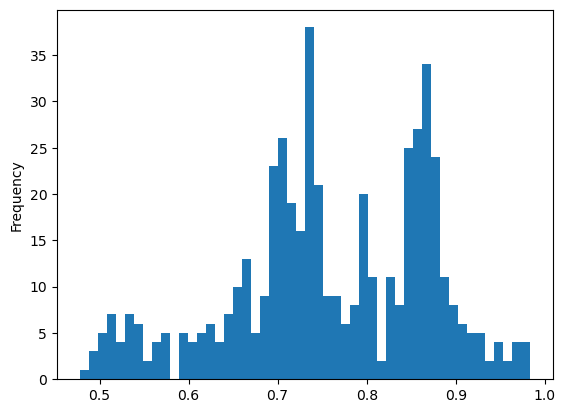

In [48]:
sent_df["score"].plot(kind="hist", bins=50)

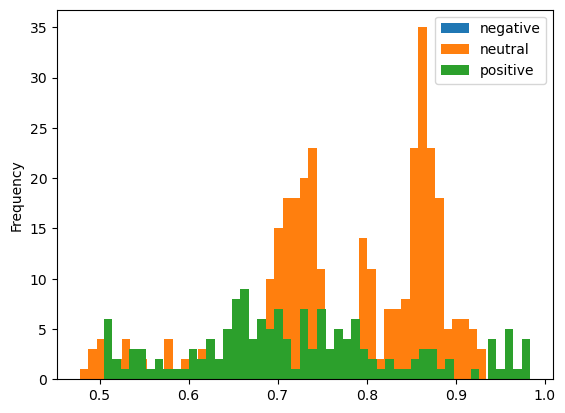

In [49]:
sent_df.groupby("label")["score"].plot(kind="hist", bins=50)
plt.legend()
plt.show()

In [51]:
sent_df["score_"] = sent_df["score"]

sent_df.loc[sent_df["label"] == "Negative", "score_"] = (
    sent_df.loc[sent_df["label"] == "Negative"]["score"] * -1
)

sent_df.loc[sent_df["label"] == "Neutral","score_"] = 0

<AxesSubplot:ylabel='Frequency'>

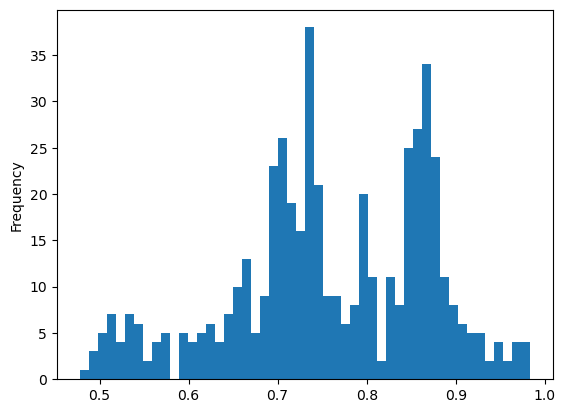

In [52]:
sent_df["score_"].plot(kind="hist", bins=50)

In [53]:
sent_df["Date"] = sent_df["Datetime"].dt.date

In [54]:
sent_df.groupby("Date")["score_"].mean()

Date
2023-02-27    0.753822
2023-02-28    0.721392
2023-03-01    0.729081
2023-03-02    0.745115
2023-03-03    0.738950
2023-03-04    0.743796
2023-03-05    0.765964
2023-03-06    0.769415
2023-03-07    0.741118
2023-03-08    0.756617
2023-03-09    0.748562
2023-03-10    0.752021
2023-03-11    0.827146
2023-03-12    0.784846
2023-03-13    0.786357
2023-03-14    0.832471
2023-03-15    0.761224
2023-03-16    0.786844
2023-03-17    0.727596
2023-03-18    0.760603
Name: score_, dtype: float64

In [56]:
sent_df["Date"] = sent_df["Datetime"].dt.date

In [57]:
sent_daily = sent_df.groupby("Date")["score_"].mean()

In [59]:
clx_df = hists["CLX"].copy()
clx_df = clx_df.reset_index()
clx_df["Date"] = clx_df["Date"].dt.date
clx_df = clx_df.set_index("Date")

In [62]:
sent_and_stock = sent_daily.to_frame("sentiment").merge(clx_df, left_index = True, right_index = True)

<AxesSubplot:xlabel='Date'>

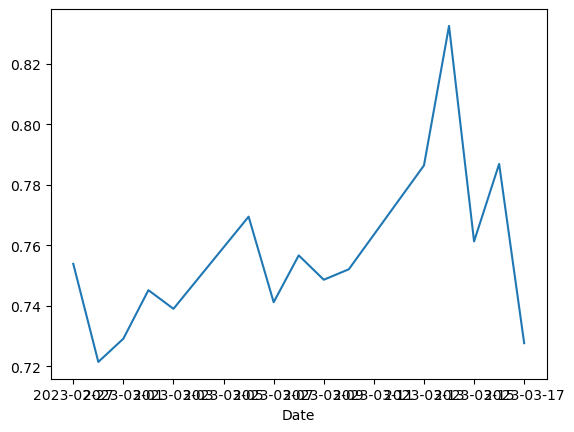

In [64]:
sent_and_stock["sentiment"].plot()

<AxesSubplot:xlabel='Date'>

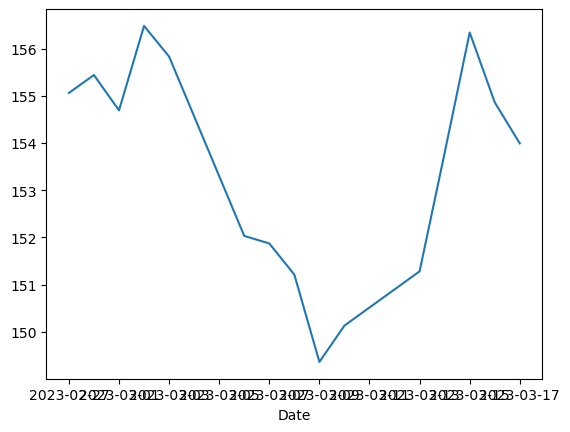

In [66]:
sent_and_stock["Close"].plot()

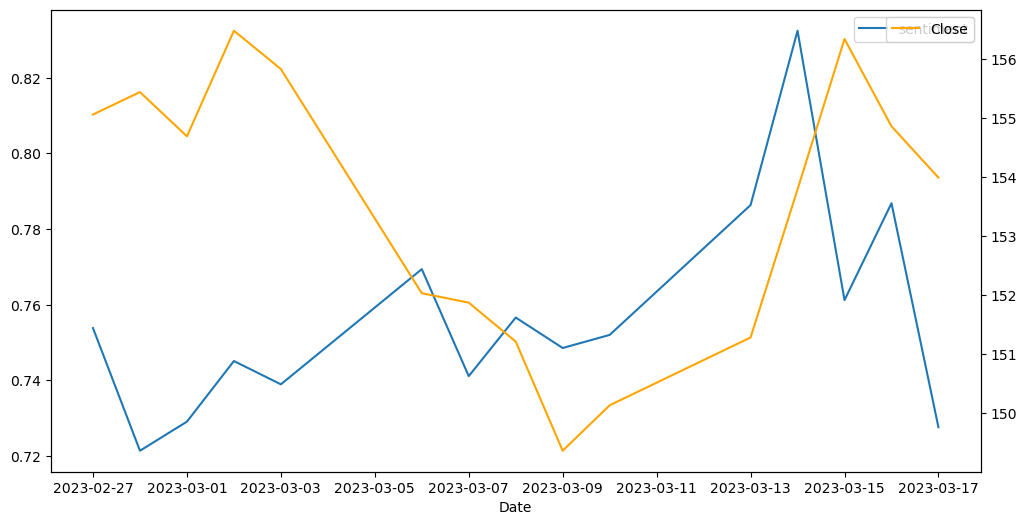

In [68]:
plt.figure(figsize=(12,6))
ax = sent_and_stock["sentiment"].plot(legend="Sentiment")
ax2 = ax.twinx()
sent_and_stock["Close"].plot(ax=ax2, color="orange", legend="Closing Price")
plt.show()